# Problem Statement : 
### We have to predict GHI after 48 hours that is total amount of solar radiation in future, given some independent weather features.


## GHI :  
Global Horizontal Irradiance is the total amount of shortwave radiation received from above by a horizontal surface. This value is of particular interest to photovoltaic installations and includes both Direct Normal Irradiance (DNI) and Diffuse Horizontal Irradiance (DIF).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\HCL\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Import Dataset

In [2]:
df = pd.read_csv("combined_data_from_2016_2019_with_out_extra_features.csv")
df.head()

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
0,2016,1,1,0,0,0,0,1,2.2,177.77,0,0.17,1.1,1.2,167,40.16,15.7,974
1,2016,1,1,1,0,0,0,1,2.5,163.98,0,0.17,1.2,1.2,179,43.10,15.0,974
2,2016,1,1,2,0,0,0,1,2.8,150.22,0,0.17,1.2,1.2,188,44.81,14.7,974
3,2016,1,1,3,0,0,0,1,3.1,136.54,0,0.17,1.2,1.2,197,46.20,14.5,974
4,2016,1,1,4,0,0,0,1,3.3,122.99,0,0.17,1.2,1.2,201,48.00,14.2,974


# Data Preprocessing

In [4]:
df.shape

(52584, 18)

In [6]:
df.isnull().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
GHI                   0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Solar Zenith Angle    0
Fill Flag             0
Surface Albedo        0
Wind Speed            0
Precipitable Water    0
Wind Direction        0
Relative Humidity     0
Temperature           0
Pressure              0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                52584 non-null  int64  
 1   Month               52584 non-null  int64  
 2   Day                 52584 non-null  int64  
 3   Hour                52584 non-null  int64  
 4   Minute              52584 non-null  int64  
 5   GHI                 52584 non-null  int64  
 6   Clearsky GHI        52584 non-null  int64  
 7   Cloud Type          52584 non-null  int64  
 8   Dew Point           52584 non-null  float64
 9   Solar Zenith Angle  52584 non-null  float64
 10  Fill Flag           52584 non-null  int64  
 11  Surface Albedo      52584 non-null  float64
 12  Wind Speed          52584 non-null  float64
 13  Precipitable Water  52584 non-null  float64
 14  Wind Direction      52584 non-null  int64  
 15  Relative Humidity   52584 non-null  float64
 16  Temp

In [8]:
df.describe()

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000
mean,2017.832497,6.523962,15.726609,11.500000,14.993154,230.250038,260.878195,2.148049,3.697457,89.713697,0.216206,0.179954,2.440299,1.970875,189.387342,37.151157,22.522592,950.982999
std,1.067672,3.448452,8.798896,6.922252,15.000141,314.952253,336.122667,2.978495,10.357552,40.093385,0.827597,0.022708,1.616668,1.667895,105.252617,25.311306,10.380155,14.190346
min,2016.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-26.100000,1.810000,0.000000,0.150000,0.100000,0.100000,0.000000,3.160000,-2.600000,925.000000
25%,2017.000000,4.000000,8.000000,5.750000,0.000000,0.000000,0.000000,0.000000,-3.500000,57.220000,0.000000,0.180000,1.300000,0.900000,100.000000,17.010000,14.600000,940.000000
50%,2018.000000,7.000000,16.000000,11.500000,0.000000,0.000000,0.000000,0.000000,2.100000,89.475000,0.000000,0.180000,1.900000,1.300000,212.000000,29.720000,23.700000,945.000000
75%,2019.000000,10.000000,23.000000,17.250000,30.000000,455.000000,539.250000,4.000000,9.200000,122.220000,0.000000,0.180000,3.200000,2.300000,264.000000,51.020000,29.900000,965.000000
max,2019.000000,12.000000,31.000000,23.000000,30.000000,1068.000000,1068.000000,9.000000,27.400000,178.540000,5.000000,0.870000,10.700000,7.700000,360.000000,100.000000,47.100000,983.000000


# Constructing Future GHI Feature(after 48 h)

In [9]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'GHI', 'Clearsky GHI',
       'Cloud Type', 'Dew Point', 'Solar Zenith Angle', 'Fill Flag',
       'Surface Albedo', 'Wind Speed', 'Precipitable Water', 'Wind Direction',
       'Relative Humidity', 'Temperature', 'Pressure'],
      dtype='object')

In [11]:
df.head(100)

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
0,2016,1,1,0,0,0,0,1,2.2,177.77,0,0.17,1.1,1.2,167,40.16,15.7,974
1,2016,1,1,1,0,0,0,1,2.5,163.98,0,0.17,1.2,1.2,179,43.10,15.0,974
2,2016,1,1,2,0,0,0,1,2.8,150.22,0,0.17,1.2,1.2,188,44.81,14.7,974
3,2016,1,1,3,0,0,0,1,3.1,136.54,0,0.17,1.2,1.2,197,46.20,14.5,974
4,2016,1,1,4,0,0,0,1,3.3,122.99,0,0.17,1.2,1.2,201,48.00,14.2,974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2016,1,4,23,0,0,0,1,-1.6,168.03,0,0.16,1.4,1.1,121,28.40,16.8,979
96,2016,1,5,0,0,0,0,1,-1.5,178.14,0,0.16,1.4,1.1,129,30.16,16.0,978
97,2016,1,5,1,0,0,0,1,-1.4,164.31,0,0.16,1.4,1.1,135,31.45,15.5,978
98,2016,1,5,2,0,0,0,1,-1.3,150.53,0,0.16,1.3,1.1,137,32.32,15.2,977


In [12]:
df.shape[0]

52584

In [3]:
l=[]
for i in range (96,df.shape[0]):
    l.append(df['GHI'][i])
    
df.drop(list(range(df.shape[0]-96,df.shape[0])),inplace=True)
df['GHI_after_48_hours'] = l

In [4]:
df['GHI_after_48_hours']

0        0
1        0
2        0
3        0
4        0
        ..
52483    0
52484    0
52485    0
52486    0
52487    0
Name: GHI_after_48_hours, Length: 52488, dtype: int64

In [36]:
df['GHI_after_48_hours'].value_counts()

0       26426
12         76
5          72
15         71
7          71
        ...  
1061        2
1053        2
1055        2
1056        1
1068        1
Name: GHI_after_48_hours, Length: 1065, dtype: int64

In [4]:
df=df[df['Year']>2017]
df

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,GHI_after_48_hours
17544,2018,1,1,0,0,0,0,0,-10.1,166.39,0,0.17,1.5,0.6,4,26.75,7.9,948,0
17545,2018,1,1,0,30,0,0,0,-10.1,163.50,0,0.17,1.5,0.6,181,27.68,7.4,948,0
17546,2018,1,1,1,0,0,0,0,-9.5,158.96,0,0.17,1.6,0.6,357,30.04,6.9,948,0
17547,2018,1,1,1,30,0,0,0,-9.5,153.61,0,0.17,1.6,0.6,356,30.87,6.5,948,0
17548,2018,1,1,2,0,0,0,0,-8.8,147.87,0,0.17,1.6,0.6,354,33.18,6.2,948,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52483,2019,12,29,21,30,0,0,7,-7.0,148.57,0,0.17,0.6,1.2,173,46.15,3.5,945,0
52484,2019,12,29,22,0,0,0,4,-6.8,154.29,0,0.17,0.7,1.2,1,47.47,3.3,945,0
52485,2019,12,29,22,30,0,0,7,-6.8,159.60,0,0.17,0.8,1.2,7,47.81,3.2,945,0
52486,2019,12,29,23,0,0,0,7,-6.3,164.05,0,0.17,0.9,1.2,13,50.60,3.0,945,0


In [4]:
l=[]
for i in df['Minute']:
    if i ==30:
        l.append(0.5)
    else:
        l.append(0)
        
df['Hour'] = df['Hour']+l

In [5]:
df.drop(['Clearsky GHI','GHI','Minute'],axis=1,inplace=True)

In [40]:
df.cov()

,Year,Month,Day,Hour,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,GHI_after_48_hours
Year,0.250000,-1.516333e-02,-3.817016e-02,0.000000e+00,0.019712,-0.008393,-0.048157,0.019677,0.000500,0.020981,-0.039791,-0.607497,1.010297,-0.320850,-0.184016,-1.535979
Month,-0.015163,1.178751e+01,-5.518907e-02,-1.623072e-16,-1.311423,-0.642592,5.478719,-0.128275,-0.008513,-0.519776,0.273313,-21.746956,-11.967602,6.175400,0.474327,-28.796056
Day,-0.038170,-5.518907e-02,7.674368e+01,-6.789989e-17,-0.724324,-0.813014,-1.756286,-0.036453,0.003007,0.726666,-0.268931,14.741464,-3.023163,-1.195733,-2.127605,3.996866
Hour,0.000000,-1.623072e-16,-6.789989e-17,4.798054e+01,0.491233,-1.247464,4.051083,0.021537,0.000037,-0.064529,-0.055338,-15.383118,-21.616991,10.497949,-2.496054,-21.336535
Cloud Type,0.019712,-1.311423e+00,-7.243236e-01,4.912331e-01,8.530388,2.709846,13.727083,0.645991,0.003262,-0.403559,0.355926,7.058045,18.639850,-7.348520,-0.353838,-120.466542
Dew Point,-0.008393,-6.425917e-01,-8.130141e-01,-1.247464e+00,2.709846,54.720720,-20.907042,0.380136,0.000233,-0.748022,5.290711,73.912836,53.264367,31.831818,-10.406840,59.486846
Solar Zenith Angle,-0.048157,5.478719e+00,-1.756286e+00,4.051083e+00,13.727083,-20.907042,1446.664371,-3.368983,-0.012599,-26.321245,-4.841372,844.873995,353.674316,-241.304962,21.578809,-10351.328083
Fill Flag,0.019677,-1.282748e-01,-3.645333e-02,2.153700e-02,0.645991,0.380136,-3.368983,0.639944,0.000141,0.008908,0.043661,-0.288112,0.561919,-0.004519,-0.036205,-3.151417
Surface Albedo,0.000500,-8.512641e-03,3.007432e-03,3.673200e-05,0.003262,0.000233,-0.012599,0.000141,0.000681,-0.000287,-0.000441,-0.027994,0.027412,-0.008567,-0.014918,0.118603
Wind Speed,0.020981,-5.197761e-01,7.266660e-01,-6.452923e-02,-0.403559,-0.748022,-26.321245,0.008908,-0.000287,3.049865,-0.122044,-4.248359,-6.104742,3.192552,-2.201876,229.872229


# Find outliers using the basic 3 standard deviations approach:
* Method: Any point outside of 3 standard deviations would be an outlier. 
* We find the z score for each of the data point in the dataset and if the z score is greater than 3 than we can classify that point as an outlier.

In [42]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Cloud Type', 'Dew Point',
       'Solar Zenith Angle', 'Fill Flag', 'Surface Albedo', 'Wind Speed',
       'Precipitable Water', 'Wind Direction', 'Relative Humidity',
       'Temperature', 'Pressure', 'GHI_after_48_hours'],
      dtype='object')

In [8]:
# Define the outlier function
def detect_outlier(data):
    outliers = []
    threshold = 3
    mean = np.mean(df[data])
    std = np.std(df[data])
    
    for x in df[data]:
        z_score = (x - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(x)
        return outliers
    
    
# Define the function to display outliers 
def display_outlier(feature):
    outlier_list = detect_outlier(feature)
    if not outlier_list:
        print(feature+" = NO outliers that are above 3 s.d.")
    else:
        print(feature+"'s outliers are'"+" | ".join(outlier_list))
        

# Display the outliers
for x in ['Year', 'Month', 'Day', 'Hour', 'Cloud Type', 'Dew Point',
       'Solar Zenith Angle', 'Fill Flag', 'Surface Albedo', 'Wind Speed',
       'Precipitable Water', 'Wind Direction', 'Relative Humidity',
       'Temperature', 'Pressure', 'GHI_after_48_hours']:
    display_outlier(x)

Year = NO outliers that are above 3 s.d.
Month = NO outliers that are above 3 s.d.
Day = NO outliers that are above 3 s.d.
Hour = NO outliers that are above 3 s.d.
Cloud Type = NO outliers that are above 3 s.d.
Dew Point = NO outliers that are above 3 s.d.
Solar Zenith Angle = NO outliers that are above 3 s.d.
Fill Flag = NO outliers that are above 3 s.d.
Surface Albedo = NO outliers that are above 3 s.d.
Wind Speed = NO outliers that are above 3 s.d.
Precipitable Water = NO outliers that are above 3 s.d.
Wind Direction = NO outliers that are above 3 s.d.
Relative Humidity = NO outliers that are above 3 s.d.
Temperature = NO outliers that are above 3 s.d.
Pressure = NO outliers that are above 3 s.d.
GHI_after_48_hours = NO outliers that are above 3 s.d.


### NO point outside of 3 standard deviations 

# Data visualization

C:\Users\HCL\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


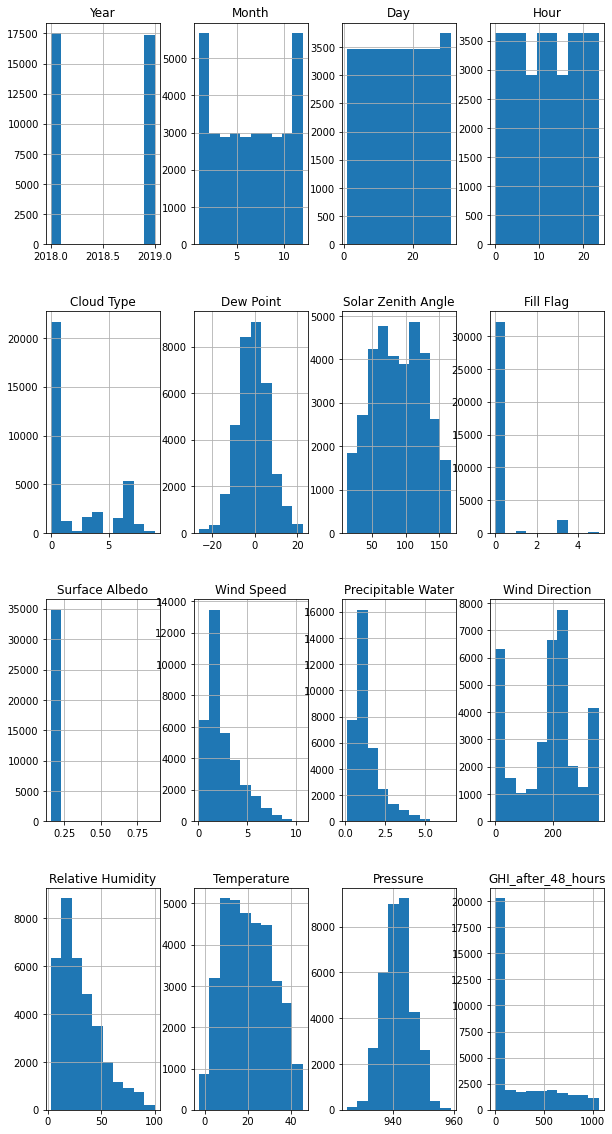

In [44]:
df.hist(bins=10,figsize=(10,20))
plt.show()

<AxesSubplot:>

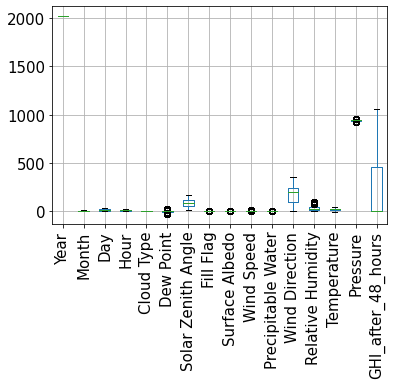

In [45]:
df.boxplot(rot = 90, fontsize=15)

In [46]:
features = df.columns

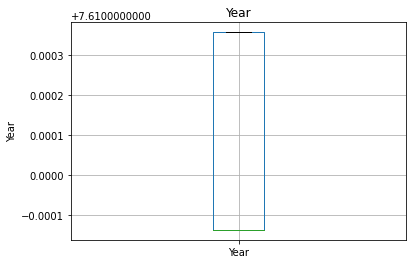

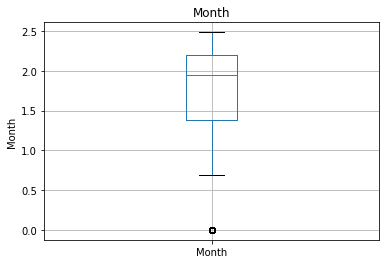

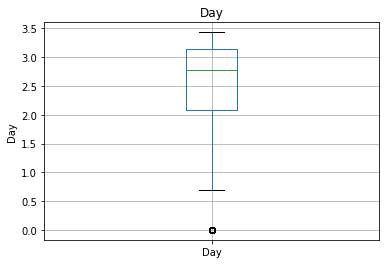

C:\Users\HCL\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


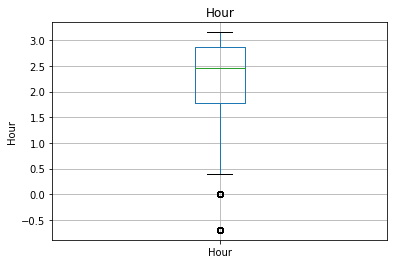

C:\Users\HCL\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\hcl\anaconda3\envs\pytorch\lib\site-packages\matplotlib\cbook\__init__.py:1182: RuntimeWarning: invalid value encountered in double_scalars
  notch_max = med + 1.57 * iqr / np.sqrt(N)


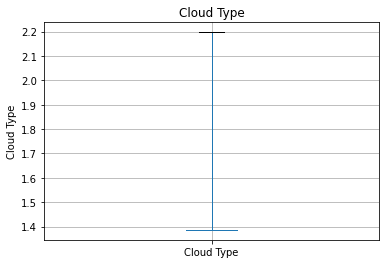

C:\Users\HCL\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\HCL\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


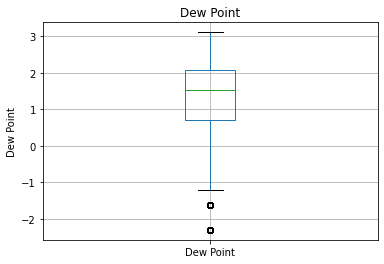

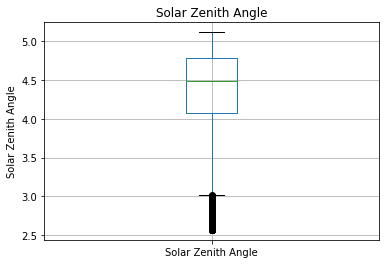

C:\Users\HCL\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\hcl\anaconda3\envs\pytorch\lib\site-packages\matplotlib\cbook\__init__.py:1236: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1


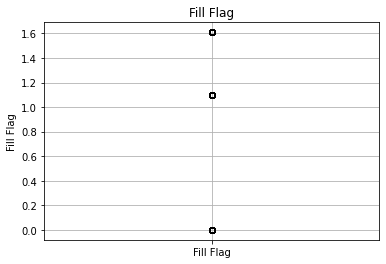

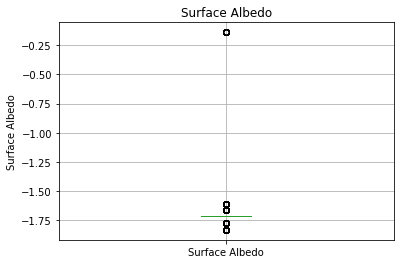

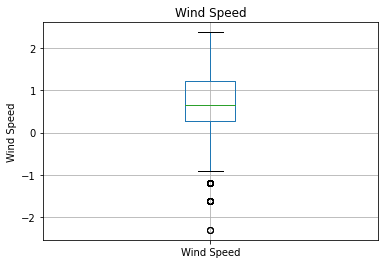

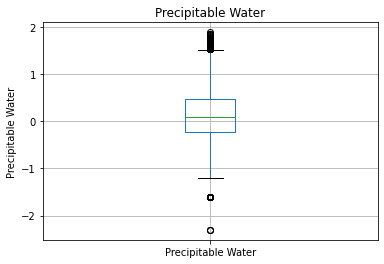

C:\Users\HCL\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


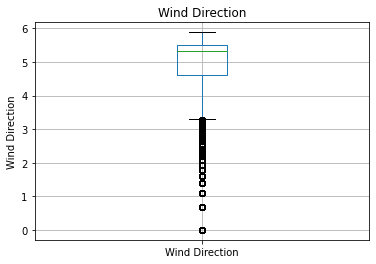

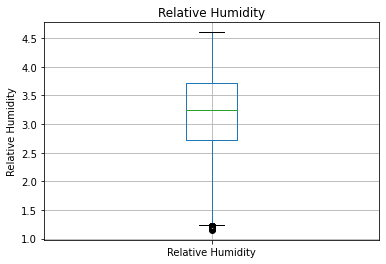

C:\Users\HCL\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\HCL\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


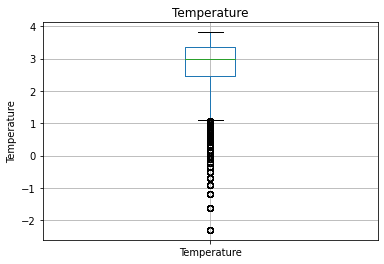

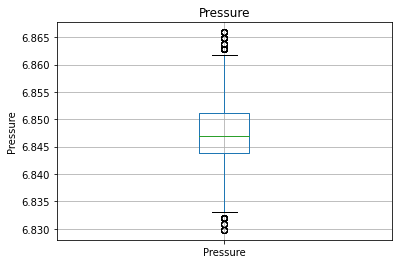

C:\Users\HCL\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\hcl\anaconda3\envs\pytorch\lib\site-packages\matplotlib\cbook\__init__.py:1182: RuntimeWarning: invalid value encountered in double_scalars
  notch_max = med + 1.57 * iqr / np.sqrt(N)


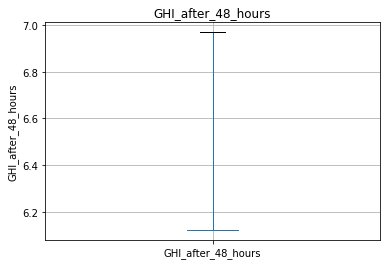

In [47]:
for feature in features:
    data=df.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature,grid = True)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

## Boxplot clearlly show the outlier in Dataset

In [48]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.quantile(0.75)-df.quantile(0.25)
IQR

Year                    1.00
Month                   5.00
Day                    15.00
Hour                   11.75
Cloud Type              4.00
Dew Point               9.50
Solar Zenith Angle     61.33
Fill Flag               0.00
Surface Albedo          0.00
Wind Speed              2.10
Precipitable Water      0.80
Wind Direction        143.00
Relative Humidity      26.14
Temperature            17.50
Pressure                7.00
GHI_after_48_hours    456.00
dtype: float64

In [49]:
lower_bridge=df.quantile(0.25)-(IQR*1.5)
upper_bridge=df.quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

Year                  2016.500
Month                   -3.500
Day                    -14.500
Hour                   -11.750
Cloud Type              -6.000
Dew Point              -19.550
Solar Zenith Angle     -32.965
Fill Flag                0.000
Surface Albedo           0.180
Wind Speed              -1.850
Precipitable Water      -0.400
Wind Direction        -114.500
Relative Humidity      -23.950
Temperature            -14.850
Pressure               927.500
GHI_after_48_hours    -684.000
dtype: float64
Year                  2020.500
Month                   16.500
Day                     45.500
Hour                    35.250
Cloud Type              10.000
Dew Point               18.450
Solar Zenith Angle     212.355
Fill Flag                0.000
Surface Albedo           0.180
Wind Speed               6.550
Precipitable Water       2.800
Wind Direction         457.500
Relative Humidity       80.610
Temperature             55.150
Pressure               955.500
GHI_after_48_hours    11

(None, None)

In [50]:
#### Extreme outliers
lower_bridge=df.quantile(0.25)-(IQR*3)
upper_bridge=df.quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

Year                  2015.000
Month                  -11.000
Day                    -37.000
Hour                   -29.375
Cloud Type             -12.000
Dew Point              -33.800
Solar Zenith Angle    -124.960
Fill Flag                0.000
Surface Albedo           0.180
Wind Speed              -5.000
Precipitable Water      -1.600
Wind Direction        -329.000
Relative Humidity      -63.160
Temperature            -41.100
Pressure               917.000
GHI_after_48_hours   -1368.000
dtype: float64
Year                  2022.000
Month                   24.000
Day                     68.000
Hour                    52.875
Cloud Type              16.000
Dew Point               32.700
Solar Zenith Angle     304.350
Fill Flag                0.000
Surface Albedo           0.180
Wind Speed               9.700
Precipitable Water       4.000
Wind Direction         672.000
Relative Humidity      119.820
Temperature             81.400
Pressure               966.000
GHI_after_48_hours    18

(None, None)

In [51]:
# Remove outlier
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(21024, 16)

In [52]:
#Remove Extreme Outlier
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out_Ext = df[~((df < (Q1 - 3 * IQR)) |(df > (Q3 + 3 * IQR))).any(axis=1)]
df_out_Ext.shape

(24301, 16)

In [54]:
df.corr(method = 'spearman')

,Year,Month,Day,Hour,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,GHI_after_48_hours
Year,1.000000,-0.008811,-0.008621,0.000000,0.008706,0.043705,-0.002380,0.069029,0.012386,0.022842,-0.023108,-0.006605,0.061516,-0.057398,-0.066857,-0.005033
Month,-0.008811,1.000000,-0.001775,0.000000,-0.137057,-0.036069,0.040397,-0.037269,-0.246781,-0.079517,0.070172,-0.064510,-0.192381,0.161741,0.033730,-0.026816
Day,-0.008621,-0.001775,1.000000,0.000000,-0.026444,-0.020220,-0.004882,0.000548,-0.023912,0.048338,-0.045845,0.016662,0.005100,-0.013747,-0.047061,0.001123
Hour,0.000000,0.000000,0.000000,1.000000,0.020503,-0.022392,0.014717,-0.012179,0.001127,-0.044674,-0.010659,-0.038491,-0.158178,0.137139,-0.076282,-0.010527
Cloud Type,0.008706,-0.137057,-0.026444,0.020503,1.000000,0.139719,0.114938,0.288133,-0.053157,-0.103271,0.173026,0.010449,0.342843,-0.233993,-0.010743,-0.116722
Dew Point,0.043705,-0.036069,-0.020220,-0.022392,0.139719,1.000000,-0.063551,0.063837,0.065026,-0.037480,0.843659,0.056769,0.381905,0.370202,-0.296159,0.016345
Solar Zenith Angle,-0.002380,0.040397,-0.004882,0.014717,0.114938,-0.063551,1.000000,-0.103657,-0.098089,-0.392177,-0.147446,0.267643,0.504587,-0.555772,0.108107,-0.923552
Fill Flag,0.069029,-0.037269,0.000548,-0.012179,0.288133,0.063837,-0.103657,1.000000,-0.003488,0.007391,0.060065,-0.012660,0.055918,-0.009841,-0.001953,0.110676
Surface Albedo,0.012386,-0.246781,-0.023912,0.001127,-0.053157,0.065026,-0.098089,-0.003488,1.000000,0.068312,0.020412,0.058816,-0.083349,0.145553,-0.168472,0.072445
Wind Speed,0.022842,-0.079517,0.048338,-0.044674,-0.103271,-0.037480,-0.392177,0.007391,0.068312,1.000000,-0.073720,-0.052704,-0.196818,0.157311,-0.234208,0.429837


# Check Corelation

<AxesSubplot:>

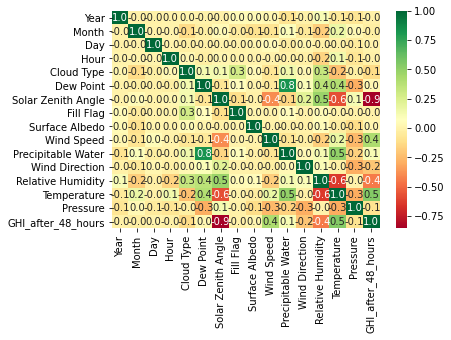

In [55]:
sns.heatmap(df.corr(), annot=True, fmt='.1f', cmap='RdYlGn')

In [56]:
print(df.corr()["GHI_after_48_hours"].abs().sort_values(ascending=False))

GHI_after_48_hours    1.000000
Solar Zenith Angle    0.856073
Temperature           0.541050
Relative Humidity     0.445317
Wind Speed            0.414043
Wind Direction        0.211502
Cloud Type            0.129742
Precipitable Water    0.110706
Pressure              0.091734
Month                 0.026383
Dew Point             0.025296
Surface Albedo        0.014291
Fill Flag             0.012392
Hour                  0.009689
Year                  0.009663
Day                   0.001435
Name: GHI_after_48_hours, dtype: float64


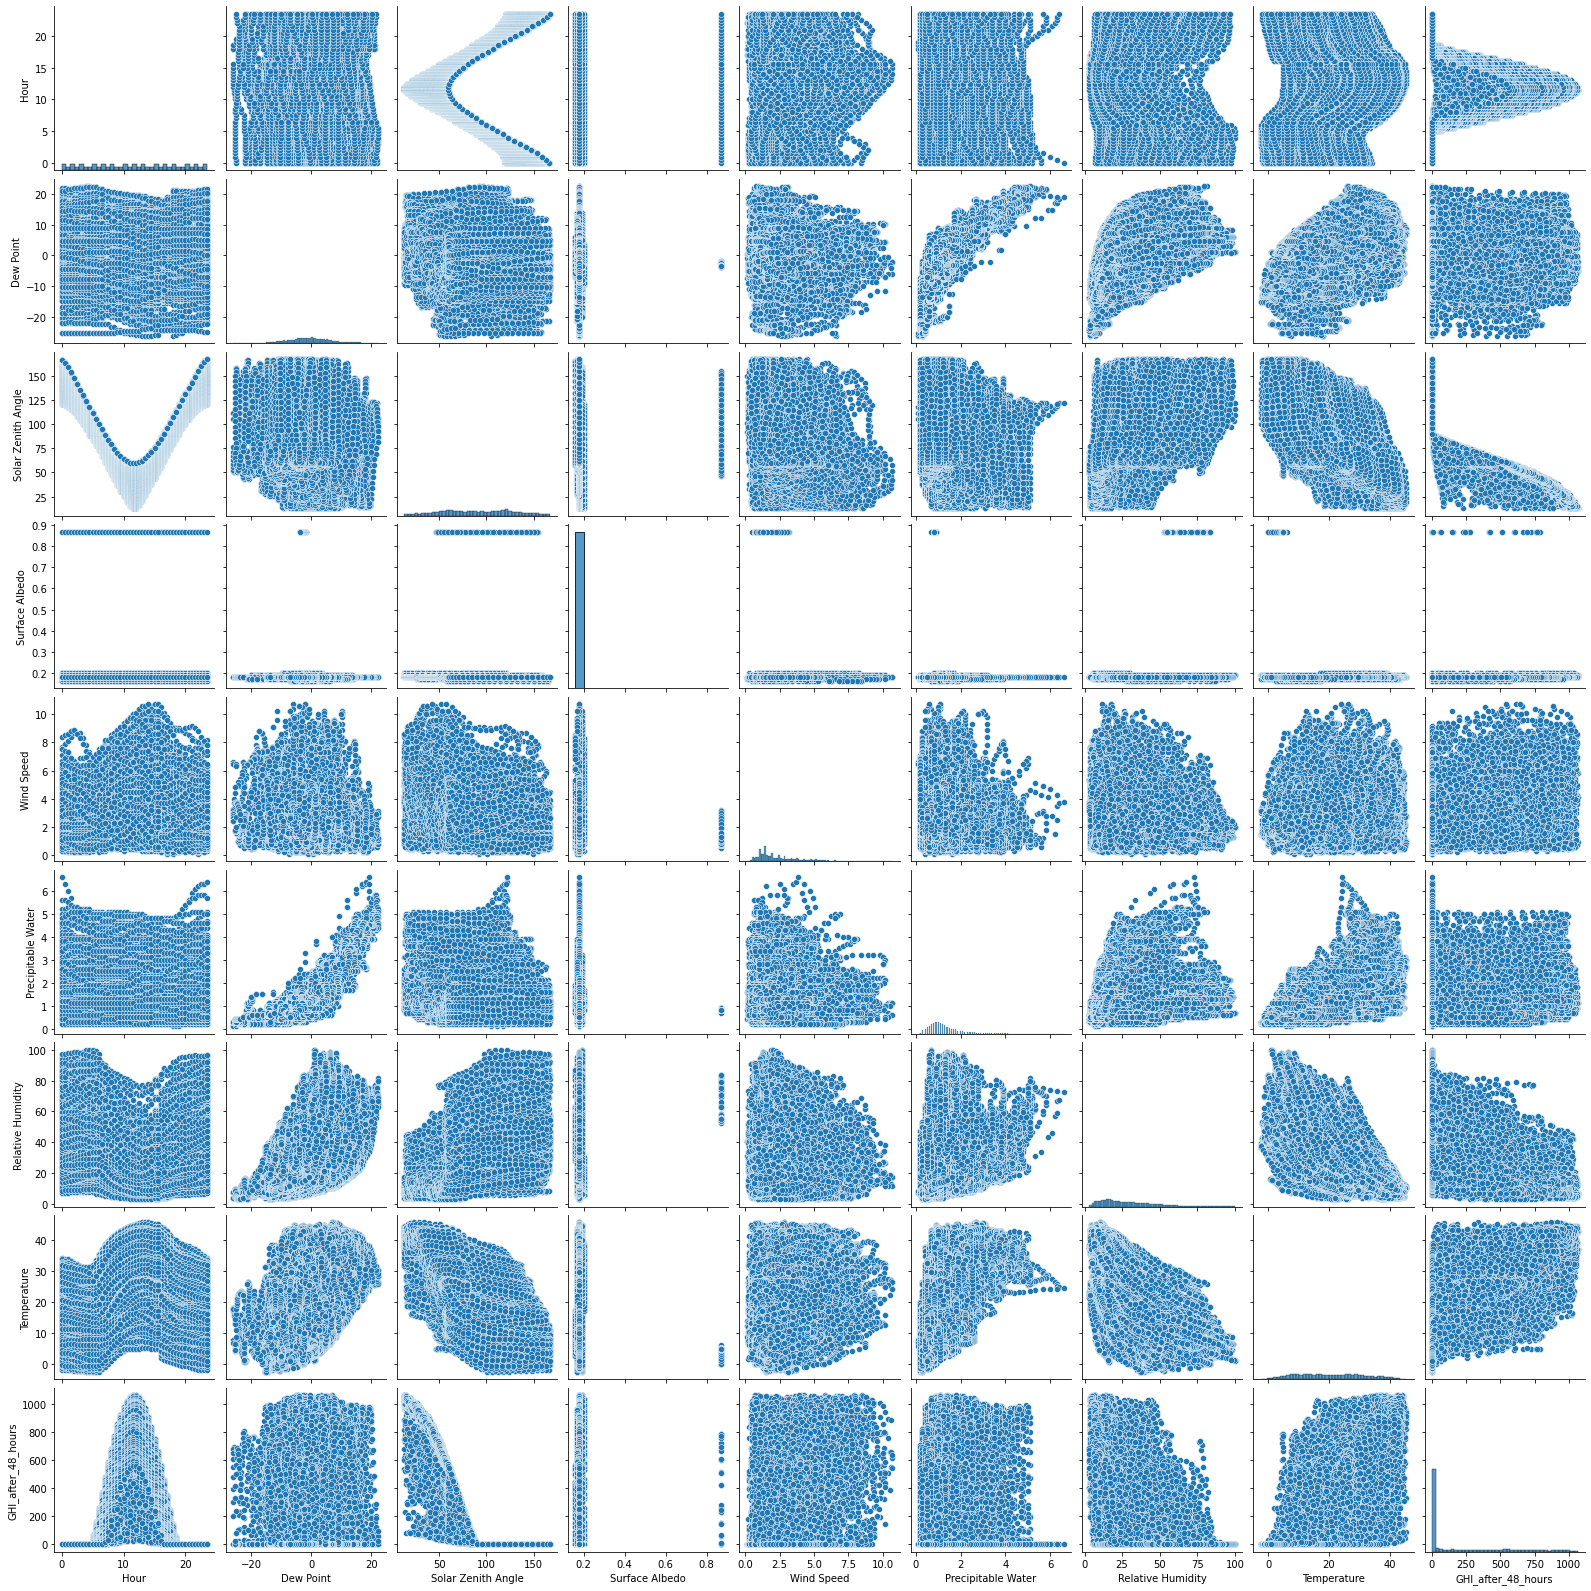

In [57]:
col =[i for i in df_out.columns if df[str(i)].dtype =='float64']
col.append('GHI_after_48_hours')
sns.pairplot(df[col])

# Model Building

# PyCaret :
- is simple and easy to use machine learning library that will help you to perform end-to-end ML experiments with less lines of code. 
- Analyzing the performance of a trained machine learning model is very critical step in the machine learning workflow.

In [58]:
import pycaret
from pycaret.regression import *
reg = setup(data=df, target='GHI_after_48_hours',remove_outliers=True,feature_selection_threshold=0.2, silent=True, feature_selection=True, transformation=False, train_size=0.8)

,Description,Value
0,session_id,184
1,Target,GHI_after_48_hours
2,Original Data,"(34848, 16)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(26484, 11)"


In [59]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,30.1993,4150.7556,64.3758,0.9591,1.0575,0.3786,16.4600
lightgbm,Light Gradient Boosting Machine,30.8380,4657.4995,68.1884,0.9541,0.5721,0.4117,7.6380
et,Extra Trees Regressor,33.4515,5523.6848,74.2742,0.9456,0.3201,0.4287,5.9540
rf,Random Forest Regressor,34.0538,5698.1292,75.4367,0.9439,0.3234,0.4363,7.3520
knn,K Neighbors Regressor,33.9270,5807.2578,76.1541,0.9429,0.5870,0.4601,0.3510
gbr,Gradient Boosting Regressor,37.2485,6359.7414,79.6835,0.9374,0.9561,0.4597,2.6160
dt,Decision Tree Regressor,42.0541,11542.4234,107.3643,0.8865,0.4500,0.4714,0.1840
ada,AdaBoost Regressor,59.1910,11661.3152,107.8491,0.8855,0.6631,0.5205,3.0280
lr,Linear Regression,128.2781,24101.5770,155.2397,0.7630,3.2406,1.4897,10.1890
ridge,Ridge Regression,128.2781,24101.5742,155.2397,0.7630,3.2406,1.4897,0.3740


# Train_Test_Split

In [7]:
#Model Fitting
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# set X to all features
X = df.loc[:,df.columns!='GHI_after_48_hours']
# set y to our target GHI
y = df.GHI_after_48_hours
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression


In [8]:
from sklearn.linear_model import LinearRegression
Lin_r = LinearRegression()
Lin_r.fit(X_train, y_train)
Lin_r.score(X_test, y_test)
y_pred_Lin_r = Lin_r.predict(X_test)

In [9]:
from sklearn.metrics import r2_score
print('R2 Score For Linear Regression:',round(r2_score(y_pred_Lin_r,y_test)*100,2))

R2 Score For Linear Regression: 67.17


In [10]:
y_pred_trainlr = Lin_r.predict(X_train)
print('R2 Score For Linear Regression:',round(r2_score(y_pred_trainlr, y_train)*100,2))

R2 Score For Linear Regression: 66.78


### Let's try with Another Model

# 2. Random Forest Regressor

In [63]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(X_train, y_train)
y_pred_RFR=regr.predict(X_test)

In [67]:
from sklearn.metrics import r2_score
print('R2 Score For Random Forest Regressor :',round(r2_score(y_pred_RFR,y_test)*100,2))

R2 Score For Random Forest Regressor : 94.57


In [68]:
y_pred_trainrfr = regr.predict(X_train)
print('R2 Score For Linear Regression:',round(r2_score(y_pred_trainrfr, y_train)*100,2))

R2 Score For Linear Regression: 99.22


#### The model in overfitted R2 score of test is 95% and R2 score of train is 99%.

# 3. xgboost  Algorithm

In [14]:
!pip install xgboost

  Using cached xgboost-1.4.1-py3-none-win_amd64.whl (97.8 MB)


In [10]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(verbosity=0)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)


c:\users\hcl\anaconda3\envs\pytorch\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [11]:
from sklearn.metrics import r2_score
print('R2 Score For xgboost :',round(r2_score(y_pred_xgb, y_test)*100,2))

R2 Score For xgboost : 95.27


In [12]:
y_pred_train = xgb_model.predict(X_train)
print('R2 Score For xgboost :',round(r2_score(y_pred_train,y_train)*100,2))

R2 Score For xgboost : 97.64


c:\users\hcl\anaconda3\envs\pytorch\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


#### The model in not overfitted R2 score of test is 96% and  R2 score of train is 98% not much difference.

# 4. Catboost

In [13]:
import catboost as ct

ct_model = ct.CatBoostRegressor()
ct_model.fit(X_train, y_train)

y_pred_ct = ct_model.predict(X_test)

Learning rate set to 0.075914
0:	learn: 294.2140276	total: 593ms	remaining: 9m 52s
1:	learn: 274.8300389	total: 631ms	remaining: 5m 14s
2:	learn: 256.5950061	total: 648ms	remaining: 3m 35s
3:	learn: 240.3183028	total: 665ms	remaining: 2m 45s
4:	learn: 225.1813882	total: 681ms	remaining: 2m 15s
5:	learn: 211.2350892	total: 698ms	remaining: 1m 55s
6:	learn: 198.4144658	total: 714ms	remaining: 1m 41s
7:	learn: 186.8479265	total: 730ms	remaining: 1m 30s
8:	learn: 176.3962683	total: 746ms	remaining: 1m 22s
9:	learn: 166.9839371	total: 764ms	remaining: 1m 15s
10:	learn: 158.0984766	total: 780ms	remaining: 1m 10s
11:	learn: 150.0285813	total: 806ms	remaining: 1m 6s
12:	learn: 142.7582701	total: 834ms	remaining: 1m 3s
13:	learn: 136.4787664	total: 852ms	remaining: 60s
14:	learn: 130.7082476	total: 868ms	remaining: 57s
15:	learn: 125.4628995	total: 884ms	remaining: 54.4s
16:	learn: 120.7543094	total: 901ms	remaining: 52.1s
17:	learn: 116.6720232	total: 917ms	remaining: 50s
18:	learn: 112.899713

164:	learn: 75.6963488	total: 3.53s	remaining: 17.9s
165:	learn: 75.6407565	total: 3.55s	remaining: 17.9s
166:	learn: 75.6039722	total: 3.57s	remaining: 17.8s
167:	learn: 75.5537600	total: 3.59s	remaining: 17.8s
168:	learn: 75.4867506	total: 3.61s	remaining: 17.8s
169:	learn: 75.4287292	total: 3.63s	remaining: 17.7s
170:	learn: 75.3828720	total: 3.65s	remaining: 17.7s
171:	learn: 75.3537246	total: 3.67s	remaining: 17.7s
172:	learn: 75.3187297	total: 3.68s	remaining: 17.6s
173:	learn: 75.2622816	total: 3.7s	remaining: 17.6s
174:	learn: 75.2300401	total: 3.72s	remaining: 17.5s
175:	learn: 75.1936665	total: 3.74s	remaining: 17.5s
176:	learn: 75.1294627	total: 3.76s	remaining: 17.5s
177:	learn: 75.0979525	total: 3.77s	remaining: 17.4s
178:	learn: 75.0544248	total: 3.79s	remaining: 17.4s
179:	learn: 75.0080721	total: 3.81s	remaining: 17.4s
180:	learn: 74.9670757	total: 3.83s	remaining: 17.3s
181:	learn: 74.9111382	total: 3.84s	remaining: 17.3s
182:	learn: 74.8778895	total: 3.86s	remaining: 

321:	learn: 69.0527891	total: 6.28s	remaining: 13.2s
322:	learn: 69.0292221	total: 6.3s	remaining: 13.2s
323:	learn: 68.9956798	total: 6.32s	remaining: 13.2s
324:	learn: 68.9702654	total: 6.33s	remaining: 13.2s
325:	learn: 68.9289531	total: 6.35s	remaining: 13.1s
326:	learn: 68.8658533	total: 6.36s	remaining: 13.1s
327:	learn: 68.8352530	total: 6.38s	remaining: 13.1s
328:	learn: 68.8221154	total: 6.39s	remaining: 13s
329:	learn: 68.7372249	total: 6.41s	remaining: 13s
330:	learn: 68.7057067	total: 6.42s	remaining: 13s
331:	learn: 68.6627100	total: 6.44s	remaining: 13s
332:	learn: 68.6332591	total: 6.46s	remaining: 12.9s
333:	learn: 68.5979680	total: 6.48s	remaining: 12.9s
334:	learn: 68.5761029	total: 6.49s	remaining: 12.9s
335:	learn: 68.5405281	total: 6.51s	remaining: 12.9s
336:	learn: 68.5237694	total: 6.52s	remaining: 12.8s
337:	learn: 68.4921878	total: 6.54s	remaining: 12.8s
338:	learn: 68.4631122	total: 6.55s	remaining: 12.8s
339:	learn: 68.4140284	total: 6.57s	remaining: 12.8s
34

479:	learn: 64.3813505	total: 9.09s	remaining: 9.85s
480:	learn: 64.3681779	total: 9.11s	remaining: 9.83s
481:	learn: 64.3434179	total: 9.12s	remaining: 9.8s
482:	learn: 64.3071643	total: 9.14s	remaining: 9.78s
483:	learn: 64.2841134	total: 9.15s	remaining: 9.76s
484:	learn: 64.2726811	total: 9.17s	remaining: 9.74s
485:	learn: 64.2538825	total: 9.19s	remaining: 9.72s
486:	learn: 64.2490892	total: 9.2s	remaining: 9.69s
487:	learn: 64.2243653	total: 9.22s	remaining: 9.68s
488:	learn: 64.1975059	total: 9.26s	remaining: 9.67s
489:	learn: 64.1703937	total: 9.28s	remaining: 9.66s
490:	learn: 64.1466583	total: 9.32s	remaining: 9.66s
491:	learn: 64.1141872	total: 9.35s	remaining: 9.65s
492:	learn: 64.1087568	total: 9.37s	remaining: 9.64s
493:	learn: 64.1025476	total: 9.39s	remaining: 9.62s
494:	learn: 64.0702020	total: 9.42s	remaining: 9.62s
495:	learn: 64.0634820	total: 9.46s	remaining: 9.61s
496:	learn: 64.0428515	total: 9.48s	remaining: 9.59s
497:	learn: 64.0364795	total: 9.49s	remaining: 9

640:	learn: 61.1197049	total: 12.3s	remaining: 6.88s
641:	learn: 61.1038040	total: 12.3s	remaining: 6.86s
642:	learn: 61.0884481	total: 12.3s	remaining: 6.84s
643:	learn: 61.0809791	total: 12.3s	remaining: 6.82s
644:	learn: 61.0510817	total: 12.3s	remaining: 6.8s
645:	learn: 61.0299906	total: 12.4s	remaining: 6.78s
646:	learn: 61.0199303	total: 12.4s	remaining: 6.75s
647:	learn: 61.0064933	total: 12.4s	remaining: 6.73s
648:	learn: 60.9782518	total: 12.4s	remaining: 6.71s
649:	learn: 60.9504221	total: 12.4s	remaining: 6.69s
650:	learn: 60.9282876	total: 12.4s	remaining: 6.67s
651:	learn: 60.8975260	total: 12.5s	remaining: 6.65s
652:	learn: 60.8849026	total: 12.5s	remaining: 6.63s
653:	learn: 60.8538046	total: 12.5s	remaining: 6.61s
654:	learn: 60.8298363	total: 12.5s	remaining: 6.59s
655:	learn: 60.8121133	total: 12.5s	remaining: 6.57s
656:	learn: 60.7881971	total: 12.5s	remaining: 6.55s
657:	learn: 60.7338196	total: 12.6s	remaining: 6.54s
658:	learn: 60.7146836	total: 12.6s	remaining: 

800:	learn: 58.1342677	total: 15.6s	remaining: 3.87s
801:	learn: 58.1054886	total: 15.6s	remaining: 3.85s
802:	learn: 58.0966959	total: 15.6s	remaining: 3.83s
803:	learn: 58.0835705	total: 15.6s	remaining: 3.81s
804:	learn: 58.0710471	total: 15.7s	remaining: 3.79s
805:	learn: 58.0497073	total: 15.7s	remaining: 3.77s
806:	learn: 58.0432069	total: 15.7s	remaining: 3.75s
807:	learn: 58.0284101	total: 15.7s	remaining: 3.73s
808:	learn: 57.9973166	total: 15.7s	remaining: 3.71s
809:	learn: 57.9875918	total: 15.7s	remaining: 3.69s
810:	learn: 57.9587700	total: 15.8s	remaining: 3.67s
811:	learn: 57.9515055	total: 15.8s	remaining: 3.65s
812:	learn: 57.9418210	total: 15.8s	remaining: 3.63s
813:	learn: 57.9271118	total: 15.8s	remaining: 3.61s
814:	learn: 57.9173889	total: 15.8s	remaining: 3.59s
815:	learn: 57.9087178	total: 15.8s	remaining: 3.57s
816:	learn: 57.8985079	total: 15.9s	remaining: 3.56s
817:	learn: 57.8700939	total: 15.9s	remaining: 3.54s
818:	learn: 57.8653807	total: 15.9s	remaining:

958:	learn: 55.6065907	total: 19.2s	remaining: 819ms
959:	learn: 55.5966122	total: 19.2s	remaining: 800ms
960:	learn: 55.5745041	total: 19.2s	remaining: 780ms
961:	learn: 55.5621740	total: 19.2s	remaining: 760ms
962:	learn: 55.5430703	total: 19.3s	remaining: 740ms
963:	learn: 55.5140644	total: 19.3s	remaining: 720ms
964:	learn: 55.4959119	total: 19.3s	remaining: 700ms
965:	learn: 55.4698303	total: 19.3s	remaining: 680ms
966:	learn: 55.4458136	total: 19.4s	remaining: 661ms
967:	learn: 55.4190880	total: 19.4s	remaining: 642ms
968:	learn: 55.4022705	total: 19.4s	remaining: 622ms
969:	learn: 55.3882204	total: 19.5s	remaining: 603ms
970:	learn: 55.3712267	total: 19.5s	remaining: 582ms
971:	learn: 55.3567122	total: 19.5s	remaining: 562ms
972:	learn: 55.3486664	total: 19.5s	remaining: 542ms
973:	learn: 55.3179185	total: 19.5s	remaining: 522ms
974:	learn: 55.3088837	total: 19.6s	remaining: 502ms
975:	learn: 55.2949505	total: 19.6s	remaining: 481ms
976:	learn: 55.2743203	total: 19.6s	remaining:

In [14]:
from sklearn.metrics import r2_score
print('R2 Score For catboost :',round(r2_score(y_pred_ct, y_test)*100,2))

R2 Score For catboost : 95.56


In [16]:
y_pred_train_ct = ct_model.predict(X_train)
print('R2 Score For catboost :',round(r2_score(y_pred_train_ct,y_train)*100,2))

R2 Score For catboost : 96.81


# save Model Catboost

In [17]:
import joblib

In [18]:
joblib.dump(ct_model,'ct_model.pkl')

['ct_model.pkl']

In [ ]:
catfile = joblib.load('ct_model.pkl')

# Visualize Feature Importance

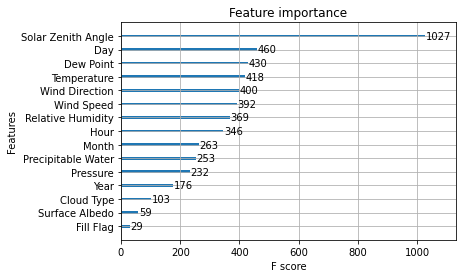

In [74]:
xgb.plot_importance(xgb_model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

###### One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear. XGBoost has a plot_importance() function that allows you to do exactly this.

# Among All the model CatBoost gives high accuracy : 96%

# Predicted value comparison

In [13]:
y_test[:10]

40689      0
26223      0
39319    339
23201      0
7340       0
15959      0
1164     899
42187    878
3227     984
10791    524
Name: GHI_after_48_hours, dtype: int64

In [14]:
y_pred_xgb [:10]

array([ -5.549565 ,   2.0032368, 388.3902   ,  -1.6492723,   1.401518 ,
        -8.792638 , 878.18335  , 900.26355  , 972.4076   , 524.2833   ],
      dtype=float32)

In [15]:
data = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred_xgb })

In [16]:
data

,Actual,Predicted
40689,0,-5.549565
26223,0,2.003237
39319,339,388.390198
23201,0,-1.649272
7340,0,1.401518
...,...,...
36001,624,565.879395
23366,415,365.933044
41834,0,-3.875528
36773,493,407.362518


c:\users\hcl\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\hcl\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GHI_after_48_hours', ylabel='Density'>

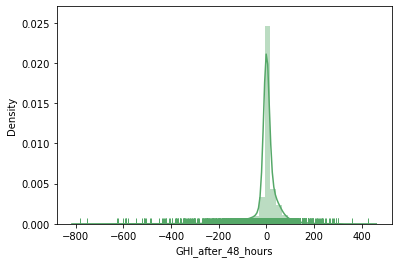

In [25]:
# Distribution plot y_test vs y_pred_xgb  prediction.

sns.set_color_codes()
sns.distplot((y_test-y_pred_xgb ),  rug=True, color="g")

# Save the Model

In [14]:
import pickle

In [23]:
with open("model_pickle",'wb') as f_out:
    pickle.dump(model, f_out)
    f_out.close()

In [24]:
## loading the model from saved file
with open('model_pickle', 'rb') as f_in:
          xgb_model = pickle.load(f_in)

In [29]:
xgb_model.predict(X_test)

c:\users\hcl\anaconda3\envs\pytorch\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


array([ -5.549565 ,   2.0032368, 388.3902   , ...,  -3.8755279,
       407.36252  ,  38.89439  ], dtype=float32)

# Save model using joblib

In [31]:
!pip install joblib

In [38]:
import sklearn.externals
import joblib


In [39]:
joblib.dump(model,'xgb_model.pkl')

['xgb_model.pkl']

In [40]:
clf = joblib.load('xgb_model.pkl')